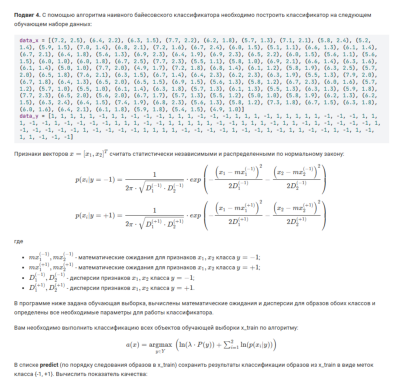

In [2]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/3_4_1.png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

In [4]:
import numpy as np

data_x = [(7.2, 2.5), (6.4, 2.2), (6.3, 1.5), (7.7, 2.2), (6.2, 1.8), (5.7, 1.3), (7.1, 2.1), (5.8, 2.4), (5.2, 1.4), (5.9, 1.5), (7.0, 1.4), (6.8, 2.1), (7.2, 1.6), (6.7, 2.4), (6.0, 1.5), (5.1, 1.1), (6.6, 1.3), (6.1, 1.4), (6.7, 2.1), (6.4, 1.8), (5.6, 1.3), (6.9, 2.3), (6.4, 1.9), (6.9, 2.3), (6.5, 2.2), (6.0, 1.5), (5.6, 1.1), (5.6, 1.5), (6.0, 1.0), (6.0, 1.8), (6.7, 2.5), (7.7, 2.3), (5.5, 1.1), (5.8, 1.0), (6.9, 2.1), (6.6, 1.4), (6.3, 1.6), (6.1, 1.4), (5.0, 1.0), (7.7, 2.0), (4.9, 1.7), (7.2, 1.8), (6.8, 1.4), (6.1, 1.2), (5.8, 1.9), (6.3, 2.5), (5.7, 2.0), (6.5, 1.8), (7.6, 2.1), (6.3, 1.5), (6.7, 1.4), (6.4, 2.3), (6.2, 2.3), (6.3, 1.9), (5.5, 1.3), (7.9, 2.0), (6.7, 1.8), (6.4, 1.3), (6.5, 2.0), (6.5, 1.5), (6.9, 1.5), (5.6, 1.3), (5.8, 1.2), (6.7, 2.3), (6.0, 1.6), (5.7, 1.2), (5.7, 1.0), (5.5, 1.0), (6.1, 1.4), (6.3, 1.8), (5.7, 1.3), (6.1, 1.3), (5.5, 1.3), (6.3, 1.3), (5.9, 1.8), (7.7, 2.3), (6.5, 2.0), (5.6, 2.0), (6.7, 1.7), (5.7, 1.3), (5.5, 1.2), (5.0, 1.0), (5.8, 1.9), (6.2, 1.3), (6.2, 1.5), (6.3, 2.4), (6.4, 1.5), (7.4, 1.9), (6.8, 2.3), (5.6, 1.3), (5.8, 1.2), (7.3, 1.8), (6.7, 1.5), (6.3, 1.8), (6.0, 1.6), (6.4, 2.1), (6.1, 1.8), (5.9, 1.8), (5.4, 1.5), (4.9, 1.0)]
data_y = [1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1]

x_train = np.array(data_x)
y_train = np.array(data_y)

# математические ожидания
mx11, mx12 = np.mean(x_train[y_train == -1], axis=0)
mx21, mx22 = np.mean(x_train[y_train == 1], axis=0)

# дисперсии
Dx11, Dx12 = np.var(x_train[y_train == -1], axis=0)
Dx21, Dx22 = np.var(x_train[y_train == 1], axis=0)

lm1 = 1     # штраф неверной классификации 1-го класса (-1)
lm2 = 1     # штраф неверной классификации 2-го класса (+1)
P1 = 0.5    # априорная вероятность появления образов 1-го класса
P2 = 1 - P1 # априорная вероятность появления образов 2-го класса

a1 = lambda x: -np.log(Dx11 * Dx12) - (x[0] - mx11) ** 2 / (2 * Dx11) - (x[1] - mx12) ** 2 / (2 * Dx12) # по расписанной формуле a(x) = argmax(..)
a2 = lambda x: -np.log(Dx21 * Dx22) - (x[0] - mx21) ** 2 / (2 * Dx21) - (x[1] - mx22) ** 2 / (2 * Dx22)

predict = []
for x in data_x:
    predict.append(np.argmax([a1(x), a2(x)]) * 2 - 1) # чтобы получить классы (1, -1)

predict = np.array(predict)
Q = np.mean(predict != data_y) # доля ошибок - критерий Айверсона
print(Q)

0.06
